In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import math

In [68]:
data = pd.read_csv('knitting_dataset_cleaned.csv', encoding='utf-8')

In [69]:
data.head()

M/C Brand Production Date M/C Dia & Gauge Booking Type  \
0  Fukuhara     01-06-2022          52 X 14         Main   
1  Fukuhara     01-06-2022          52 X 14         Main   
2  Fukuhara     01-06-2022          52 X 14         Main   
3  Fukuhara     01-06-2022          52 X 14         Main   
4  Fukuhara     01-06-2022          52 X 14         Main   

                       Lot                                        Color  \
0                 MGF-SS-8                            PURE WHITE 00010    
1                 MGF-SS-8                            PURE WHITE 00010    
2                   MGF-63                    CHARCOAL HEATHER - 00009    
3  BF-22-10200,BF-22-12463  RIBBON RED[19-1663 TCX]; 5MM TIPPING-WHITE    
4              BF-22-12463  RIBBON RED[19-1663 TCX]; 5MM TIPPING-WHITE    

    Color Range stitch Dia  GSM  ...  yarn_count_tex_1  yarn_count_tex_2  \
0  White Color   4.75   52  700  ...         24.608333               NaN   
1  White Color   4.75   52  700  ...         24.608333               NaN   
2         Wash   4.75   52  700  ...         24.608333               NaN   
3         Wash   4.70   52  700  ...         24.608333               NaN   
4         Wash   4.70   52  700  ...         24.608333               NaN   

   yarn_count_tex_3  stitch_1  stitch_2  stitch_3 tightness_factor  \
0               NaN      4.75       NaN       NaN         1.044353   
1               NaN      4.75       NaN       NaN         1.044353   
2               NaN      4.75       NaN       NaN         1.044353   
3               NaN      4.70       NaN       NaN         1.055464   
4               NaN      4.70       NaN       NaN         1.055464   

  composition  construction  body_part  
0      Cotton           Rib        Rib  
1      Cotton           Rib        Rib  
2      Cotton           Rib        Rib  
3      Cotton         other        Rib  
4      Cotton         other        Rib  

[5 rows x 38 columns]

In [20]:
def dia_cleaner(x):
    if '/' in x:
        return x.split('/')[1] 
    elif ',' in x: 
        return x.split(',')[1]
    else:
        return x

In [21]:
data['Dia']= data['Dia'].apply(lambda x: dia_cleaner(x))

In [22]:
def reject_qty(x):
    try:
        return float(x)
    except:
        return None


In [23]:
data.isna().sum()

M/C Brand                      0
Production Date                0
M/C Dia & Gauge                0
Booking Type                   0
Lot                           36
Color                          0
Color Range                    0
stitch                         0
Dia                            0
GSM                            0
SHIFT-A                        0
SHIFT-B                        0
SHIFT-C                        0
Without Shift(Outbound)       52
Shift Total                    0
Machine Total                359
Reject Qty                  4448
Yarn_Count                     0
Yarn_count_length              0
m/c_dia                        0
m/c_gauge                      0
fabric_dia_1                   0
fabric_dia_2                   0
contraction_1                  0
contraction_2                  0
contraction                    0
number_of_feeders              0
yarn_count_1                   0
yarn_count_tex_1               0
yarn_count_tex_2            7697
yarn_count

In [8]:
data['construction'].value_counts()

construction
S/J             5648
LS/J            1970
Rib             1913
Fleece_terry    1168
Mesh             621
Pique            571
Interlock        571
other            107
Name: count, dtype: int64

In [22]:
data.columns

Index(['M/C Brand', 'Production Date', 'M/C Dia & Gauge', 'Booking Type',
       'Lot', 'Color', 'Color Range', 'stitch', 'Dia', 'GSM', 'SHIFT-A',
       'SHIFT-B', 'SHIFT-C', 'Without Shift(Outbound)', 'Shift Total',
       'Machine Total', 'Reject Qty', 'Yarn_Count', 'Yarn_count_length',
       'm/c_dia', 'm/c_gauge', 'fabric_dia_1', 'fabric_dia_2', 'contraction_1',
       'contraction_2', 'contraction', 'number_of_feeders', 'yarn_count_1',
       'yarn_count_tex_1', 'yarn_count_tex_2', 'yarn_count_tex_3', 'stitch_1',
       'stitch_2', 'stitch_3', 'tightness_factor', 'composition',
       'construction', 'body_part'],
      dtype='object')

Text(0, 0.5, 'Stitch length')

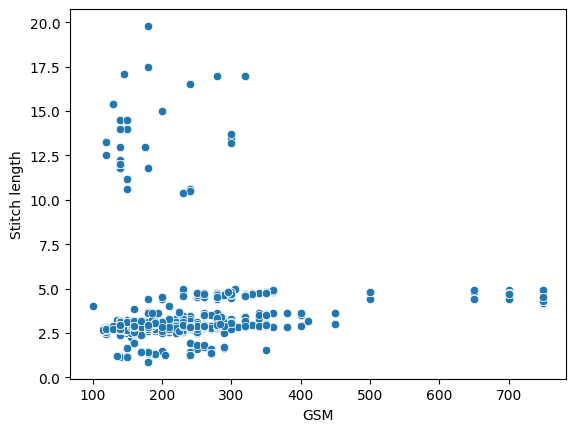

In [24]:
a= sns.scatterplot(x='GSM', y='stitch_1', data=data)
a.set_ylabel('Stitch length')

it clearly shows 2 clusters in the GSM-stitch length scatter plot. So let's plot them seperately

# which cluster for which fabric??

In [25]:
stitch_cluster_1 = data[data['stitch_1']<5]
stitch_cluster_2 = data[data['stitch_1']>10]

<Axes: xlabel='GSM', ylabel='stitch_1'>

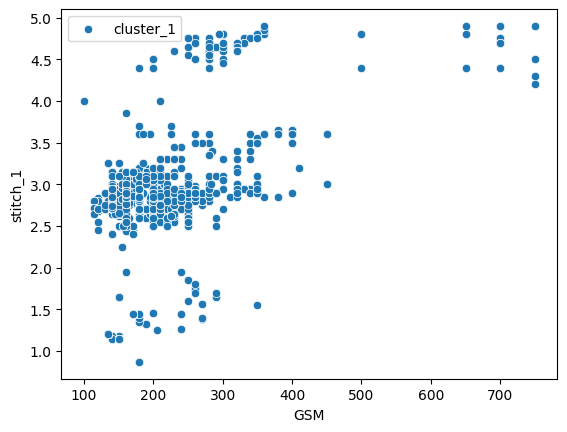

In [29]:
sns.scatterplot(x='GSM', y='stitch_1', data=stitch_cluster_1, label = 'cluster_1')

<Axes: xlabel='GSM', ylabel='stitch_1'>

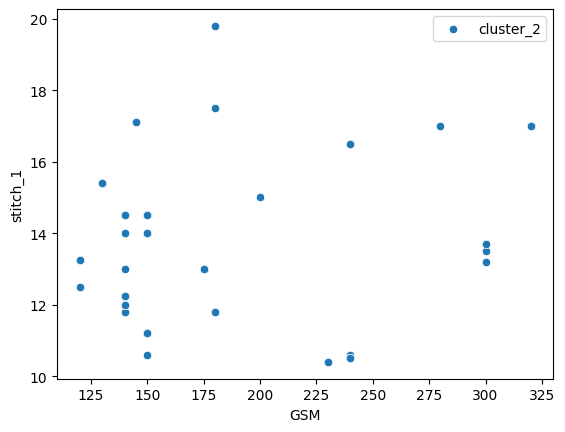

In [31]:
sns.scatterplot(x='GSM', y='stitch_1', data=stitch_cluster_2, label = 'cluster_2')

In [17]:
#GSM vs fabric type
data['construction_sorted'].value_counts()

construction_sorted
S/J             5648
LS/J            1970
Rib             1912
Fleece_terry    1168
Mesh             621
Pique            571
Interlock        571
other            106
Name: count, dtype: int64

In [33]:
s_j = data[data['construction'] == 'S/J']
l_s_j = data[data['construction'] == 'LS/J']
rib = data[data['construction'] == 'Rib']
fleece = data[data['construction'] == 'Fleece_terry']
mesh = data[data['construction'] == 'Mesh']
pique = data[data['construction'] == 'Pique']
interlock = data[data['construction'] == 'Interlock']

In [34]:
#removing outlier
s_j = s_j[s_j['stitch_1']<3.5]

In [35]:
lr = LinearRegression()

In [37]:
#selecting only Cotton yarn
s_j_cotton = s_j[s_j['composition']=='Cotton']

# S J cotton

In [41]:
gsm = s_j_cotton[['GSM']]
sl  = s_j_cotton[['stitch_1']]
lm = LinearRegression()
lm.fit(sl, gsm)
gsm_pred = lm.predict(sl).reshape(-1,)
r2_score(s_j_cotton['GSM'], gsm_pred)

0.1506332211364988

Text(3.1, 242, 'R2 score = 0.16')

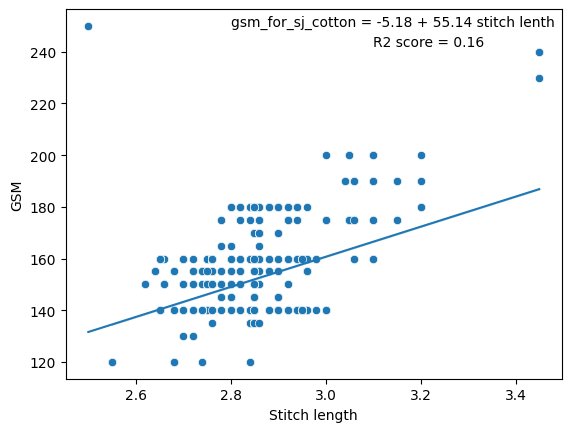

In [42]:
a= sns.scatterplot(y='GSM', x='stitch_1', data=s_j_cotton)
a.set_xlabel('Stitch length')
sns.lineplot(y=gsm_pred, x='stitch_1', data=s_j_cotton)
plt.text(2.8, 250, 'gsm_for_sj_cotton = -5.18 + 55.14 stitch lenth')
plt.text(3.1, 242, 'R2 score = 0.16')

The cotton yarn show no strong relation between stitch length and GSM 

# Lycra Single Jersey

In [46]:
l_s_j = data[data['construction'] == 'LS/J']

In [45]:
l_s_j_cotton = l_s_j[l_s_j['composition']== 'Cotton']

In [47]:
s_j_cotton = s_j[s_j['composition']== 'Cotton']

In [48]:
gsm = s_j_cotton[['GSM']]
ne = s_j_cotton[['yarn_count_Ne']]

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(ne, gsm)

LinearRegression()

In [51]:
gsm_pred = lr.predict(s_j_cotton[['yarn_count_Ne']])

In [52]:
r2_score(gsm, gsm_pred)

0.7827703856848107

In [53]:
lr.coef_

array([[-4.63488637]])

In [54]:
lr.intercept_

array([286.15291625])

Text(30.4, 220, 'GSM= 283 - 4.55*yarn_count')

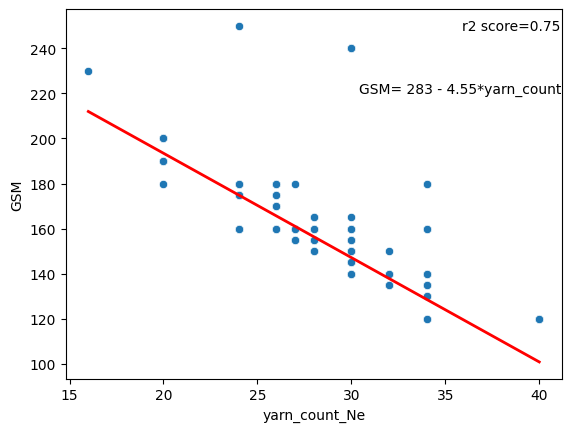

In [55]:
# cotton GSM yourn count
sns.scatterplot(y='GSM', x='yarn_count_Ne', data=s_j_cotton)
sns.lineplot(x='yarn_count_Ne', y = gsm_pred.reshape(-1,), data= s_j_cotton, c='r', lw=2 )
plt.text(35.9, 248, 'r2 score=0.75')
plt.text(30.4, 220,'GSM= 283 - 4.55*yarn_count')

### Yarn count and GSM have strong linear relation with r2=0.78 

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly = PolynomialFeatures()
yarn_count_Ne_poly = poly.fit_transform(s_j_cotton[['yarn_count_Ne']])

In [58]:
lr.fit(yarn_count_Ne_poly, gsm)

LinearRegression()

In [59]:
ne_poly = lr.predict(yarn_count_Ne_poly)

In [60]:
lr.coef_

array([[  0.        , -13.24431699,   0.15343517]])

In [61]:
lr.intercept_

array([405.63049587])

In [ ]:
# y = 429 -15x yarn count + 0.19 yarn count^ 2 

In [62]:
# gsm_pred_poly = 
def gsm_pred(x):
    return 425-15*x + 0.19*(x**2)

In [63]:
gsm_pred_2 = s_j_cotton['yarn_count_Ne'].apply(lambda x: gsm_pred(x))

In [64]:
r2_score(s_j_cotton['GSM'], gsm_pred_2)

0.7892788653204312

In [65]:
r2_score(s_j_cotton['GSM'], ne_poly)

0.7948677028298735

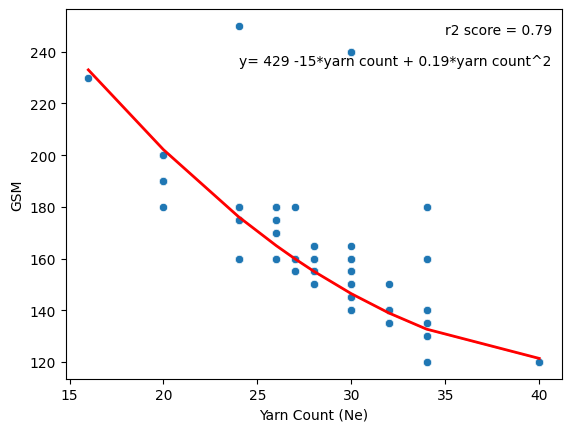

In [67]:
# cotton GSM yourn count
sns.scatterplot(y='GSM', x='yarn_count_Ne', data=s_j_cotton)
sns.lineplot(x='yarn_count_Ne', y = ne_poly.reshape(-1,), data= s_j_cotton, c='r', lw=2 )
plt.text(35, 247, 'r2 score = 0.79')
plt.text(24, 235, 'y= 429 -15*yarn count + 0.19*yarn count^2' )
plt.xlabel('Yarn Count (Ne)');

### However, Polynomial regression shows more strong relation between yarn count and GSM with r2 score = 0.79

# lycra S/J: Ne vs GSM

In [68]:
l_s_j.shape

(1970, 43)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()
poly = PolynomialFeatures()
yarn_count_Ne_poly = poly.fit_transform(l_s_j[['yarn_count_Ne']])

In [70]:
gsm_lsj = l_s_j[['GSM']]

In [71]:
lr.fit(yarn_count_Ne_poly, gsm_lsj)
lsj_poly = lr.predict(yarn_count_Ne_poly)

In [42]:
# lsj_poly

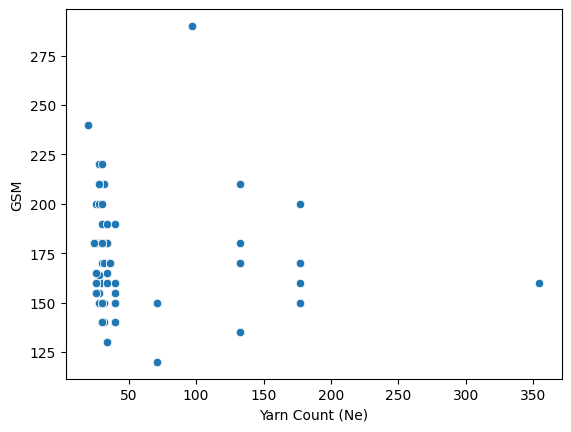

In [73]:
# cotton GSM yourn count
sns.scatterplot(y='GSM', x='yarn_count_Ne', data=l_s_j)
plt.xlabel('Yarn Count (Ne)');

### No strong relation between Yarn count (Ne) and GSM

# Rib

<Axes: xlabel='yarn_count_Ne', ylabel='GSM'>

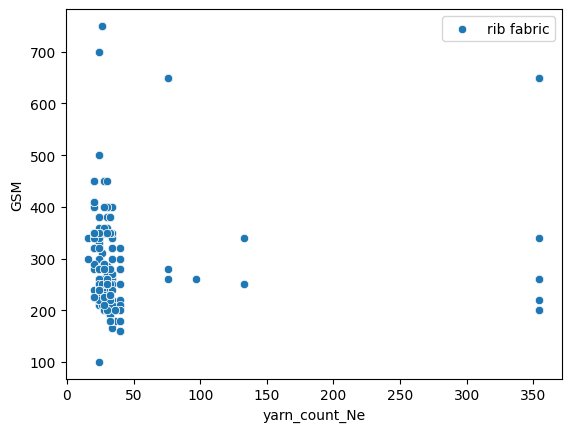

In [77]:
gsm_rib = rib[['GSM']]
ne_rib = rib[['yarn_count_Ne']]
ne_rib_poly = poly.fit_transform(ne_rib)
#fitting
lr.fit(ne_rib_poly, gsm_rib)
gsm_rib_p = lr.predict(ne_rib_poly)
#visualization
sns.scatterplot(x='yarn_count_Ne', y='GSM', data= rib, label='rib fabric')
# sns.lineplot(x='yarn_count_Ne', y = gsm_rib_p.reshape(-1,), data= rib, c='r', lw=2 )

### No strong relation between Yarn count (Ne) and GSM

<Axes: xlabel='yarn_count_Ne', ylabel='GSM'>

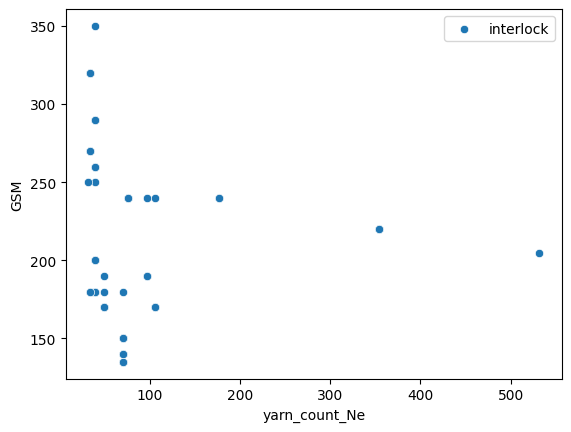

In [78]:
gsm_interlock = interlock[['GSM']]
ne_interlock = interlock[['yarn_count_Ne']]
ne_interlock_poly = poly.fit_transform(ne_interlock)
#fitting
lr.fit(ne_interlock_poly, gsm_interlock)
gsm_interlock_p = lr.predict(ne_interlock_poly)
#visualization
sns.scatterplot(x='yarn_count_Ne', y='GSM', data= interlock, label = 'interlock')
# sns.lineplot(x='yarn_count_Ne', y = gsm_interlock_p.reshape(-1,), data= interlock, c='r', lw=2 )

### No strong relation between Yarn count (Ne) and GSM

# GSM vs Stitch length 

In [66]:
# data['stitch_1']
data['yarn_count_Ne']

<Axes: xlabel='stitch_1', ylabel='GSM'>

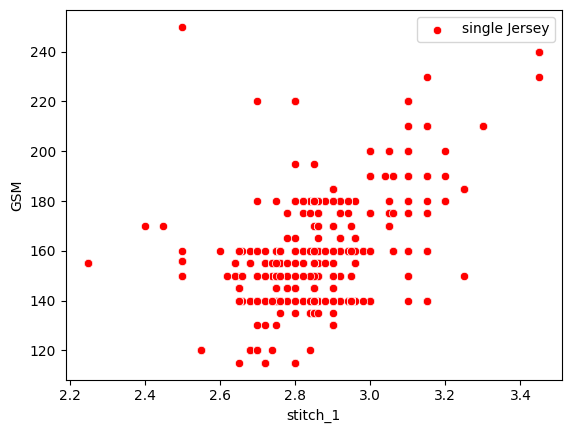

In [80]:
fig, axs = plt.subplots()
sns.scatterplot(x='stitch_1', y='GSM', data= s_j, label='single Jersey', ax=axs,c='red' )

## Let's see the pair plot

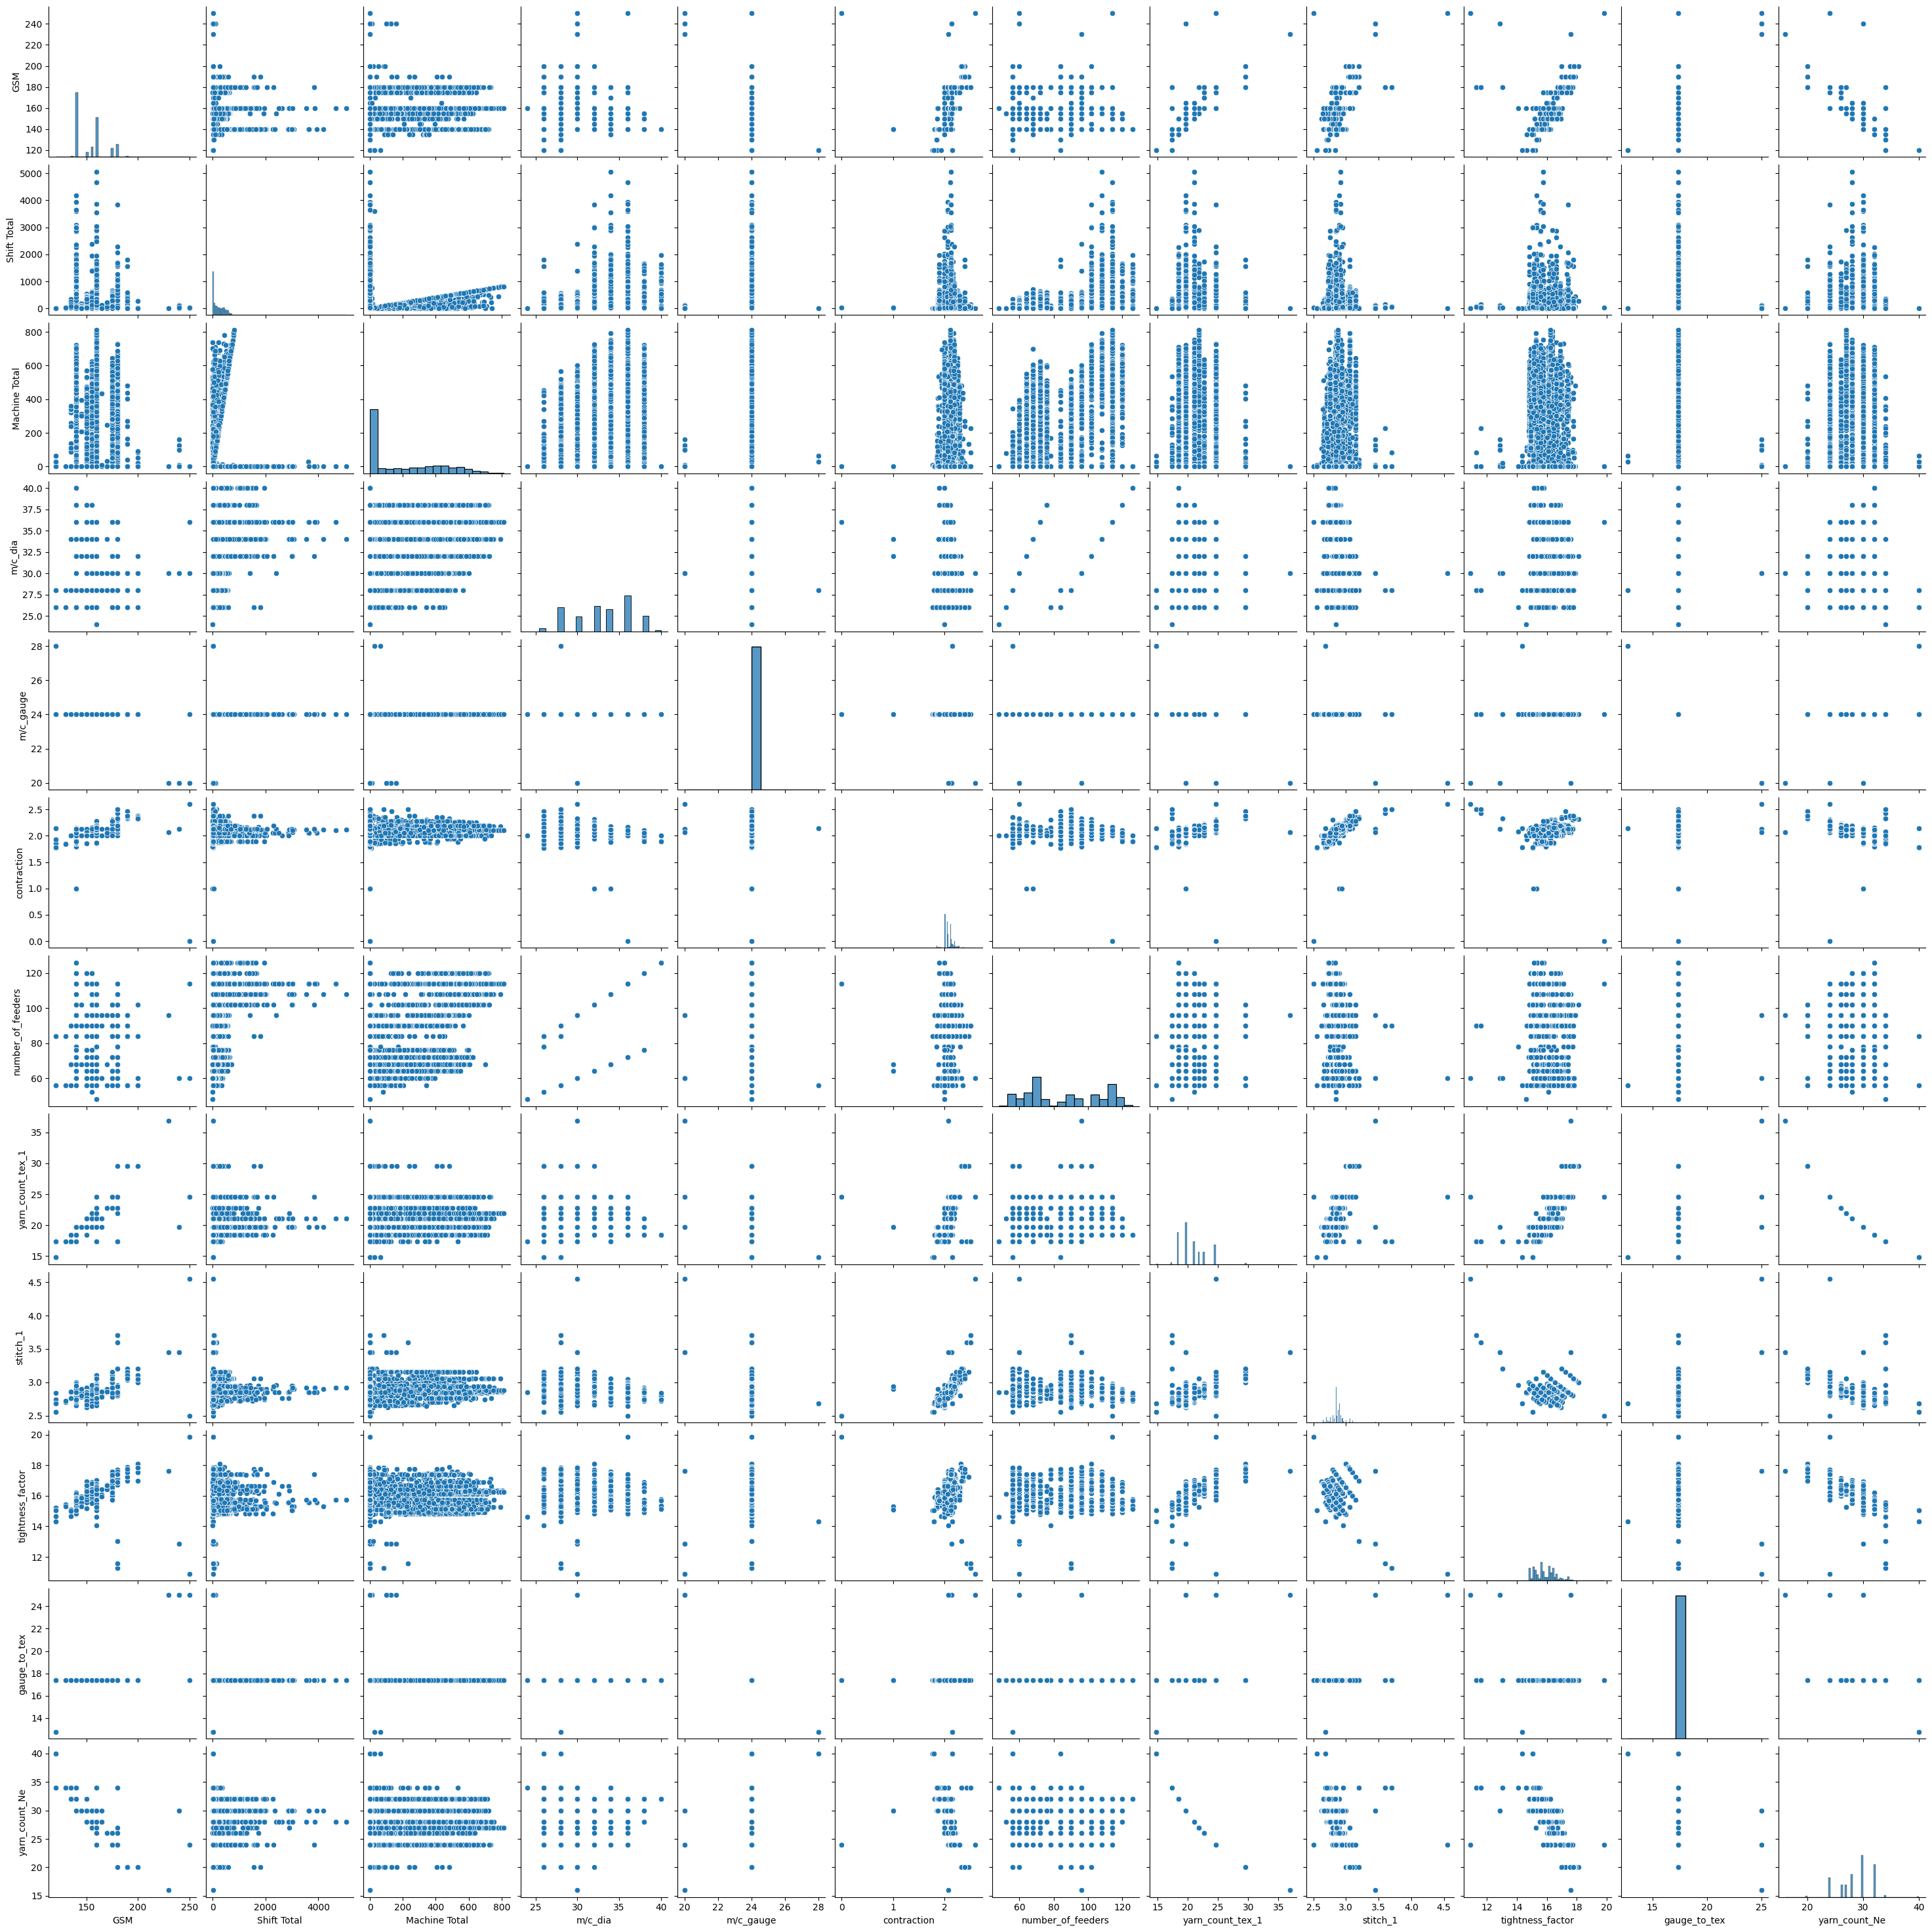

In [118]:
sns.pairplot(s_j_cotton)

## tightness_factor and GSM relation

<Axes: xlabel='tightness_factor', ylabel='GSM'>

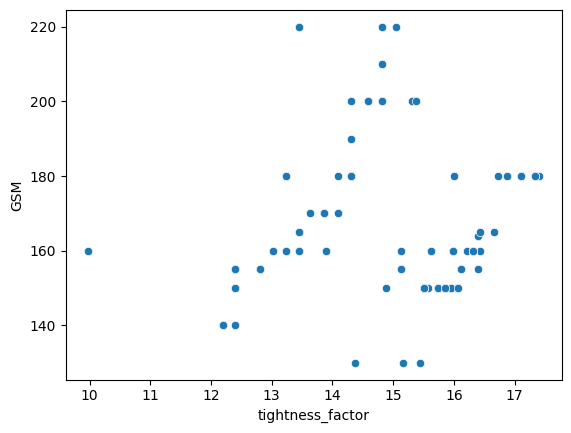

In [23]:
sns.scatterplot(x='tightness_factor', y='GSM', data= l_s_j_cotton)

# relations

In [51]:
s_j = data[data['construction_sorted'] == 'S/J']

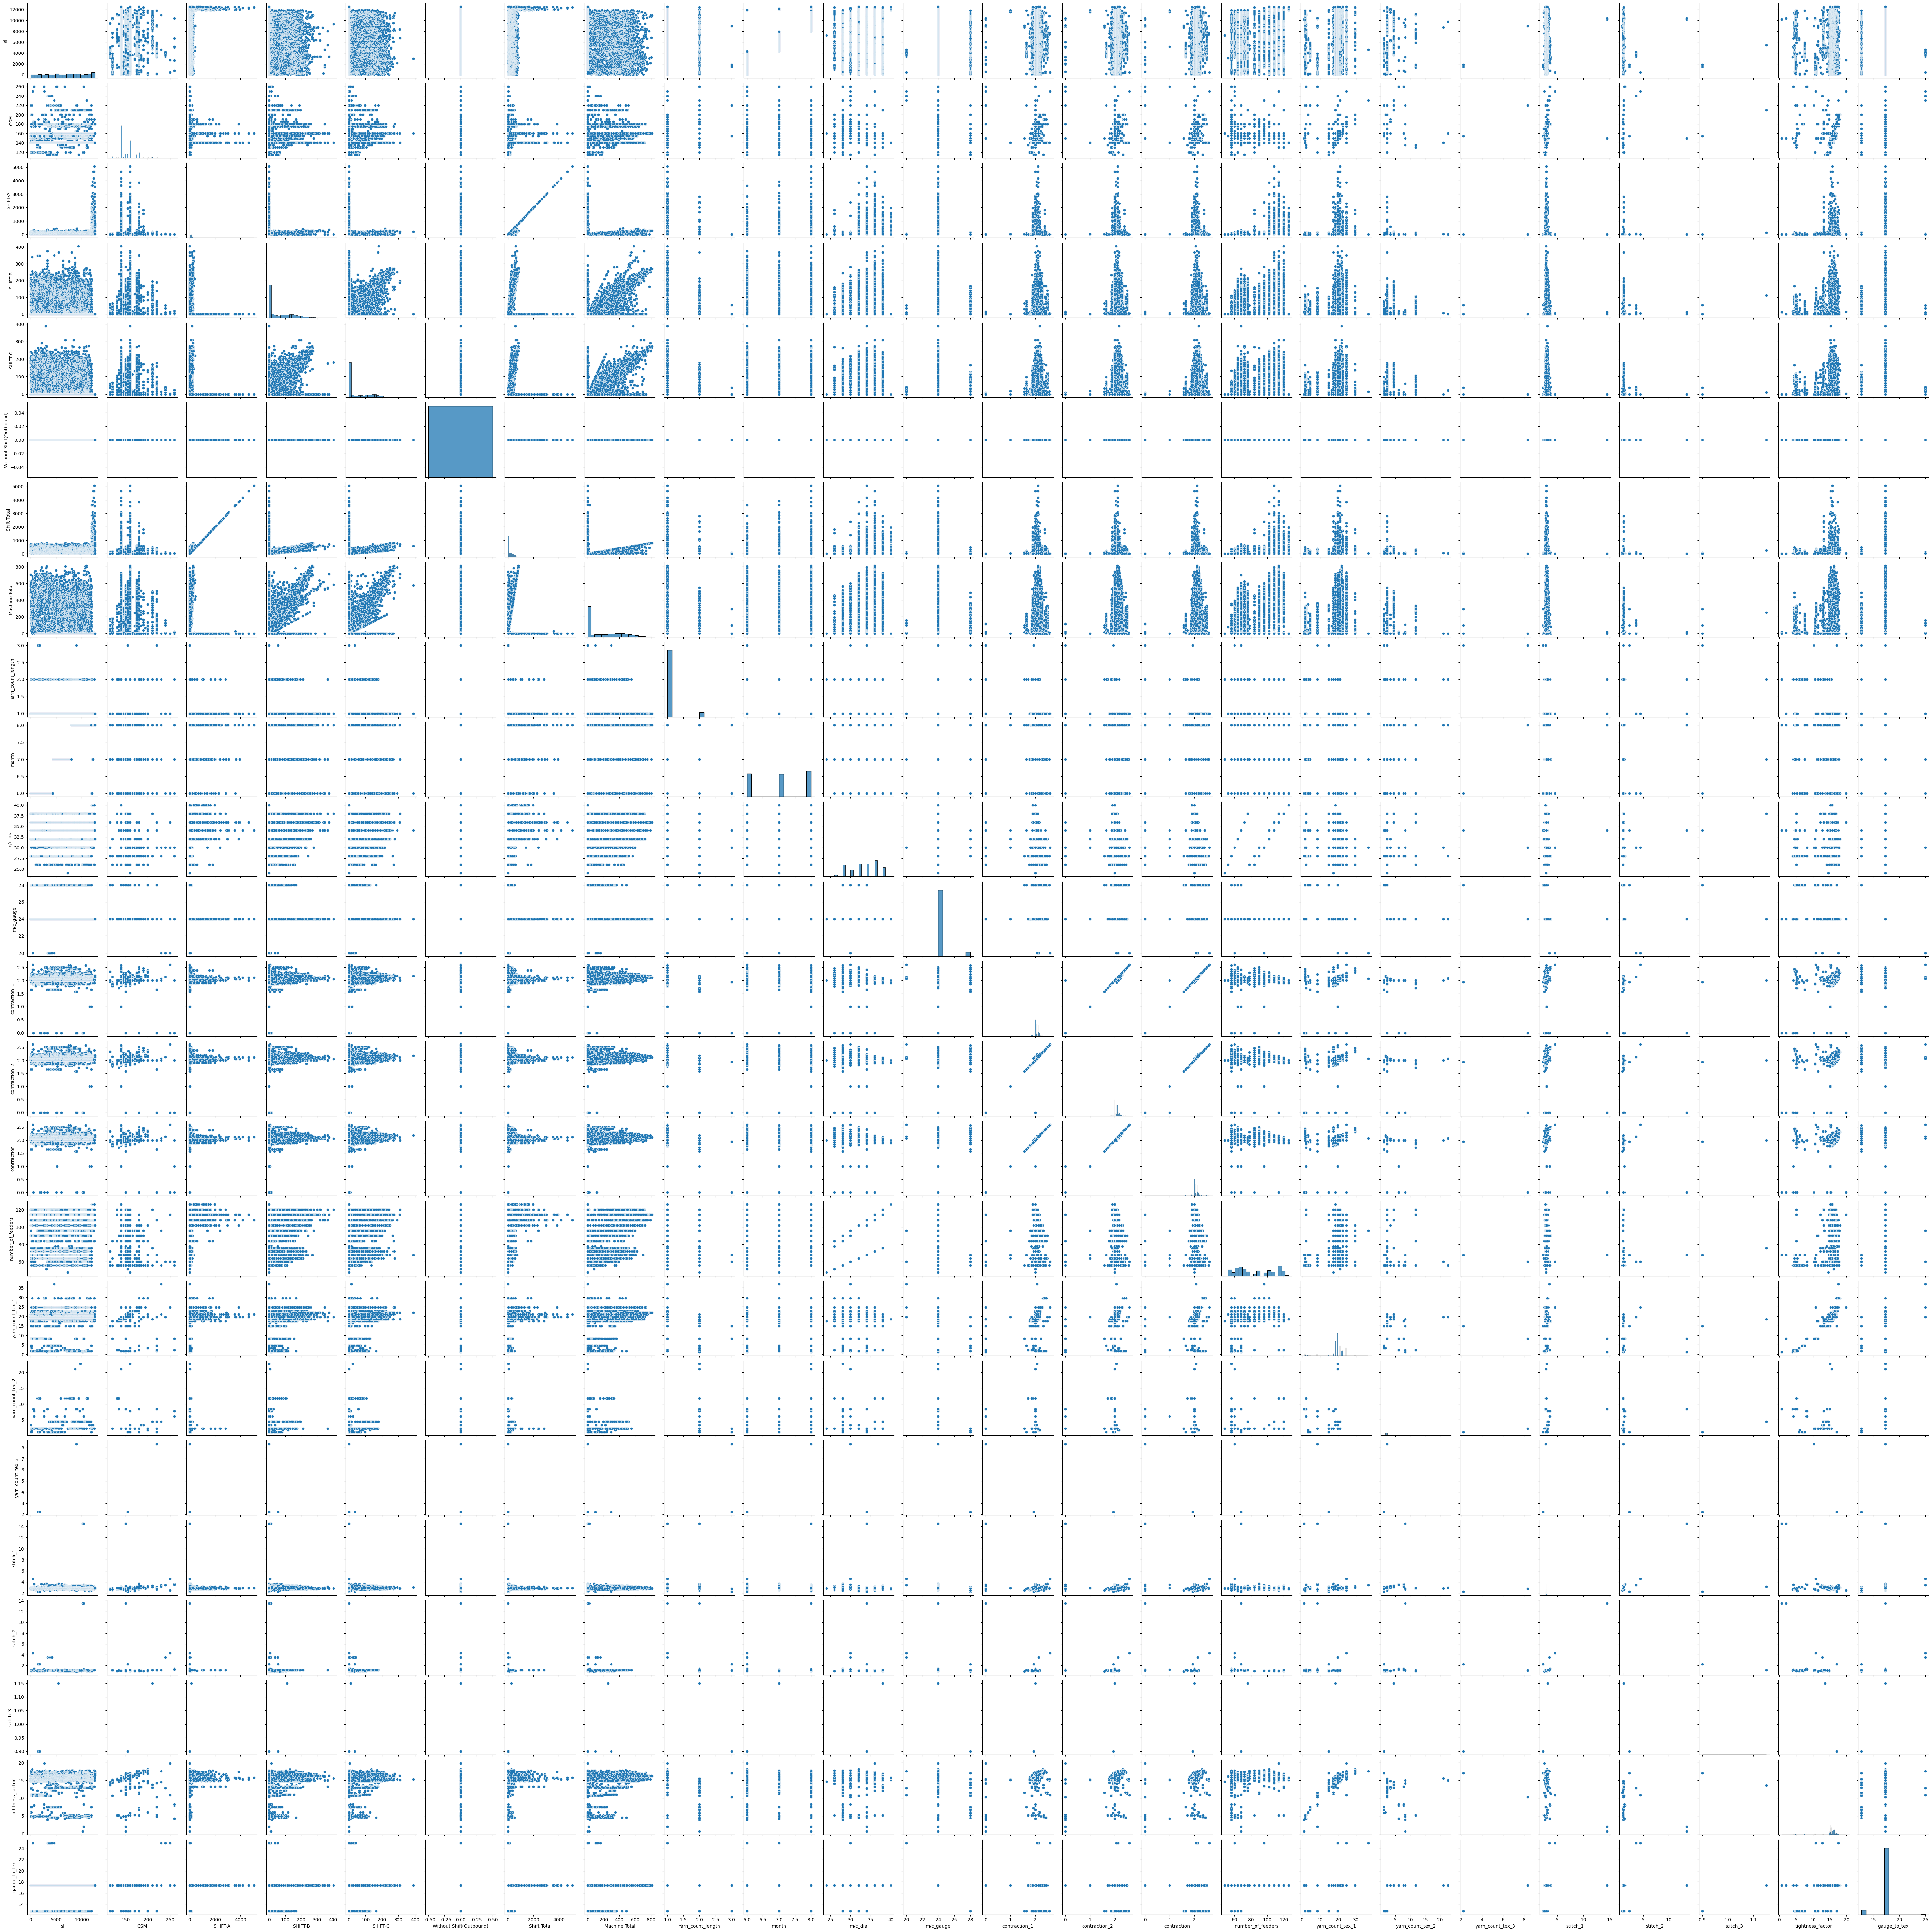

In [52]:
sns.pairplot(s_j)

In [39]:
data['stitch_one']= data['Stich'].apply(lambda x: x if len(x.split('/'))==1 else 0)

In [41]:
data_sl = data[data['stitch_one'] !=0]

In [48]:
data_sl['construction_sorted'].value_counts()

construction_sorted
S/J          5289
Rib           827
Interlock     158
Pique          95
LS/J           87
other          63
Name: count, dtype: int64

<Axes: xlabel='GSM', ylabel='stitch_1'>

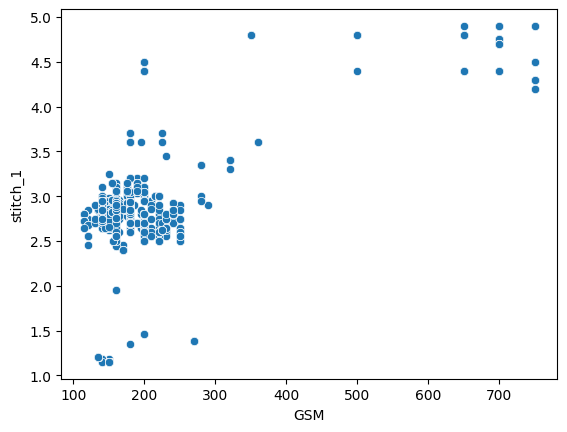

In [44]:
sns.scatterplot(x='GSM', y= 'stitch_1', data= data_sl  )

In [36]:
from scipy.optimize import curve_fit


In [86]:
data_gsm = data_to_sc[data_to_sc['GSM']<400]

In [87]:
data_rm_outliers = data_gsm[data_gsm['Shift Total']<2500]

In [94]:
x1 = data_rm_outliers['GSM']
y1 = data_rm_outliers['Shift Total']
def lograthimic_function(x,a,b,c):
    return a*np.exp(-b*x/10) + c*10 #y=be^-ax + c
constants, _ = curve_fit(lograthimic_function, x1,y1)

In [95]:
constants

array([ 0.54127672,  4.79167184, -0.05834418])

In [96]:
a_fit = constants[0]
b_fit = constants[1]
c_fit = constants[2]


In [97]:
shift_pred = lograthimic_function(x1, a_fit, b_fit, c_fit)

In [98]:
r2_score(data_rm_outliers['Shift Total'], shift_pred)

0.027537235603273258

<Axes: xlabel='GSM', ylabel='Shift Total'>

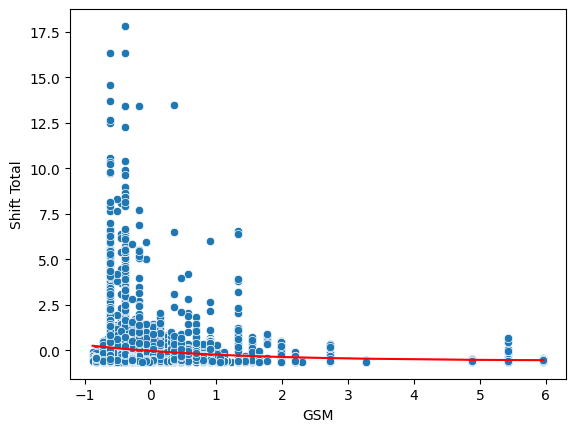

In [99]:
sns.scatterplot(x='GSM', y='Shift Total', data=data_rm_outliers)
sns.lineplot(x='GSM', y= shift_pred, data= data_rm_outliers, c='r')

## tightness factor vs GSM relation 

In [17]:
from scipy.optimize import curve_fit
x1 = data['stitch_1']
y1 = data['tightness_factor']
def lograthimic_function(x,a,b,c):
    return b*np.exp(-a*x/10) + c #y=be^-ax + c
constants, _ = curve_fit(lograthimic_function, x1,y1)

In [18]:
constants

array([ 3.21354051, 33.43875422,  1.8914126 ])

In [19]:
a_fit = constants[0]
b_fit = constants[1]
c_fit = constants[2]


In [21]:
tightness_factor_pred = lograthimic_function(x1, a_fit, b_fit, c_fit)

Text(0, 0.5, 'tightness factor')

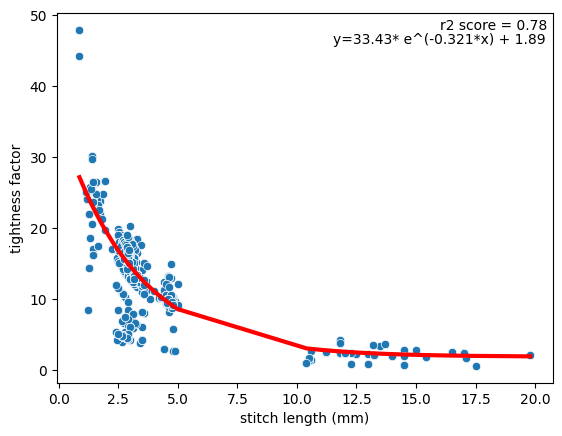

In [31]:
sns.scatterplot(x= 'stitch_1', y = 'tightness_factor', data=data  )
sns.lineplot(x= 'stitch_1', y = tightness_factor_pred, data=data, lw=3, c='r'  )
plt.text(11.5,46, s='y=33.43* e^(-0.321*x) + 1.89')
plt.text(16,48, s='r2 score = 0.78')
plt.xlabel('stitch length (mm)')
plt.ylabel('tightness factor')

In [47]:
r2_score(data['tightness_factor'], tightness_factor_pred)

0.7787894259724644

# Dia vs Contraction

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(data[['Dia']], data[['contraction']])
contraction_predict = lr.predict(data[['Dia']])
print('r2 socre', r2_score(data[['contraction']], contraction_predict))

r2 socre 0.214745155715117


<Axes: xlabel='Dia', ylabel='contraction'>

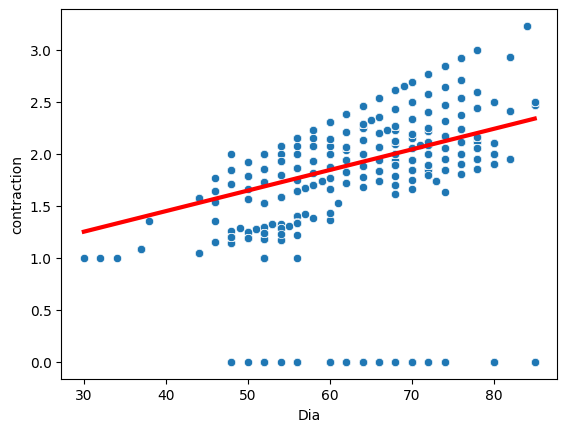

In [75]:
sns.scatterplot(x='Dia', y= 'contraction', data = data)
sns.lineplot(x='Dia', y= contraction_predict.reshape(-1,), data= data, c='r', lw=3 )

# GSM prediction

In [26]:
selected_cols = [ 
      'Color Range', 'GSM',  'Shift Total', 
       'Yarn_Count', 'Yarn_count_length', 'm/c_dia', 'm/c_gauge',
       'fabric_dia_1', 'fabric_dia_2', 
       'contraction', 'number_of_feeders', 'yarn_count_1', 'yarn_count_tex_1',
       'stitch_1',  'tightness_factor', 'composition', 'construction',
       'body_part']

In [70]:
data = data[selected_cols]

## missing value

In [50]:
data.isna().sum()

Color Range          0
GSM                  0
Shift Total          0
Yarn_Count           0
Yarn_count_length    0
m/c_dia              0
m/c_gauge            0
fabric_dia_1         0
fabric_dia_2         0
contraction          0
number_of_feeders    0
yarn_count_1         0
yarn_count_tex_1     0
stitch_1             0
tightness_factor     0
composition          0
construction         0
body_part            0
dtype: int64

In [71]:
x = data.copy()
y= x.pop('GSM')

### train test split

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

## OHE

In [96]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [97]:
ohe_cols = ['Color Range', 'Yarn_Count', 'fabric_dia_1',
       'fabric_dia_2', 'yarn_count_1', 'composition', 'construction',
       'body_part']
non_ohe_cols = ['Shift Total', 'Yarn_count_length', 'm/c_dia', 'm/c_gauge',
       'contraction', 'number_of_feeders', 'yarn_count_tex_1', 'stitch_1',
       'tightness_factor']

In [98]:
ohe.fit(X_train[ohe_cols])

OneHotEncoder(handle_unknown='ignore')

In [99]:
X_train_ohe = pd.DataFrame(ohe.transform(X_train[ohe_cols]).toarray(), columns= ohe.get_feature_names_out(), index= X_train.index)
X_test_ohe = pd.DataFrame(ohe.transform(X_test[ohe_cols]).toarray(), columns= ohe.get_feature_names_out(), index=X_test.index)

## scaling

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [101]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train[non_ohe_cols]), columns= non_ohe_cols, index=X_train.index)
X_test_sc = pd.DataFrame(sc.transform(X_test[non_ohe_cols]), columns= non_ohe_cols, index = X_test.index)

In [103]:
X_train_okay = pd.concat([X_train_sc, X_train_ohe], axis=1)
X_test_okay = pd.concat([X_test_sc, X_test_ohe], axis=1)

In [106]:
X_train_okay.head()

Shift Total  Yarn_count_length   m/c_dia  m/c_gauge  contraction  \
5441      0.466898          -0.731450  0.876208   0.037843    -0.111088   
11273    -0.610828          -0.731450 -0.807734   0.037843     0.042677   
9416     -0.467521           0.833554  0.034237   0.037843    -0.644744   
9484     -0.352364          -0.731450 -1.228720   0.037843     0.460040   
2639      0.020892           0.833554  0.876208   0.037843    -0.264853   

       number_of_feeders  yarn_count_tex_1  stitch_1  tightness_factor  \
5441           -0.251130         -0.212262 -0.378525          0.300126   
11273          -0.951416          0.221333 -0.413111          0.651549   
9416           -0.601273         -1.904131  2.919740         -2.464584   
9484            0.361619          0.788340 -0.309353          0.491137   
2639           -0.251130         -0.700055 -0.318785         -0.143875   

       Color Range_,Navy   ...  construction_Mesh  construction_Pique  \
5441                  0.0  ...                0.0                 0.0   
11273                 0.0  ...                0.0                 0.0   
9416                  0.0  ...                0.0                 1.0   
9484                  0.0  ...                0.0                 0.0   
2639                  0.0  ...                0.0                 0.0   

       construction_Rib  construction_S/J  construction_other  body_part_Body  \
5441                0.0               1.0                 0.0             0.0   
11273               0.0               1.0                 0.0             0.0   
9416                0.0               0.0                 0.0             1.0   
9484                0.0               1.0                 0.0             0.0   
2639                0.0               0.0                 0.0             0.0   

       body_part_Bottom  body_part_Rib  body_part_Top  body_part_other  
5441                0.0            0.0            1.0              0.0  
11273               0.0            0.0            1.0              0.0  
9416                0.0            0.0            0.0              0.0  
9484                1.0            0.0            0.0              0.0  
2639                1.0            0.0            0.0              0.0  

[5 rows x 326 columns]

## machine learning models

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [ ]:
models = [LinearRegression(), RandomForestRegressor(), XGBRegressor()]
r2_score =[]
y_pred={}
for model in models:
    model.fit(X_test_okay, y_train)
    y_pred[model.na] = 

In [127]:
models = {'Linear Regression':LinearRegression(), 'Random Regression': RandomForestRegressor(), 'XGBRegressor': XGBRegressor()}
y_pred = {}
r2_score_dict ={}
for model_name, model in models.items():
    model.fit(X_train_okay, y_train)
    predictions = model.predict(X_test_okay)
    y_pred[model_name] = predictions
    r2_score_value = r2_score(y_test, predictions)
    r2_score_dict[model_name] = r2_score_value

In [128]:
r2_score_dict

{'Linear Regression': -3.4556937892352885e+19,
 'Random Regression': 0.9821478734316142,
 'XGBRegressor': 0.9834203887898646}

### plotting the results

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

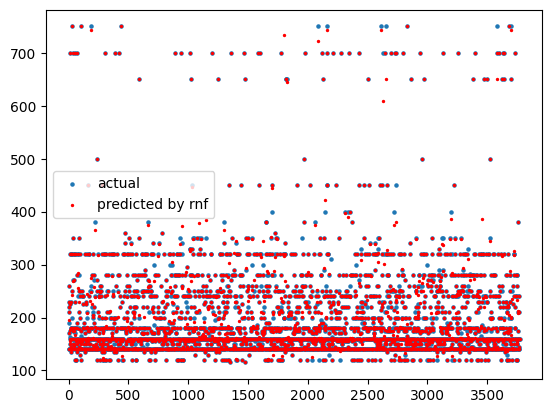

In [148]:
plt.scatter(range(X_test_okay.shape[0]), y_test, s=5, label ='actual')
plt.scatter(range(X_test_okay.shape[0]), y_pred['Random Regression'], c='r', s=2, label='predicted by rnf')
plt.legend()
# plt.scatter(range(X_test_okay.shape[0]), y_pred['Linear Regression'], c='y')